___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Choropleth Maps

## Offline Plotly Usage

Get imports and set everything up to be working offline.

In [4]:
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

Now set up everything so that the figures show up in the notebook:

In [5]:
init_notebook_mode(connected=True) 

More info on other options for Offline Plotly usage can be found [here](https://plot.ly/python/offline/).

## Choropleth US Maps

Plotly's mapping can be a bit hard to get used to at first, remember to reference the cheat sheet in the data visualization folder, or [find it online here](https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf).

In [6]:
import pandas as pd

Now we need to begin to build our data dictionary. Easiest way to do this is to use the **dict()** function of the general form:

* type = 'choropleth',
* locations = list of states
* locationmode = 'USA-states'
* colorscale= 

Either a predefined string:

    'pairs' | 'Greys' | 'Greens' | 'Bluered' | 'Hot' | 'Picnic' | 'Portland' | 'Jet' | 'RdBu' | 'Blackbody' | 'Earth' | 'Electric' | 'YIOrRd' | 'YIGnBu'

or create a [custom colorscale](https://plot.ly/python/heatmap-and-contour-colorscales/)

* text= list or array of text to display per point
* z= array of values on z axis (color of state)
* colorbar = {'title':'Colorbar Title'})

Here is a simple example:

In [7]:
data = dict(type = 'choropleth',
            locations = ['AZ','CA','NY'],
            locationmode = 'USA-states',
            colorscale= 'Portland',
            text= ['text1','text2','text3'],
            z=[1.0,2.0,3.0],
            colorbar = {'title':'Colorbar Title'})

Then we create the layout nested dictionary:

In [8]:
layout = dict(geo = {'scope':'usa'})

Then we use: 

    go.Figure(data = [data],layout = layout)
    
to set up the object that finally gets passed into iplot()

In [9]:
choromap = go.Figure(data = [data],layout = layout)

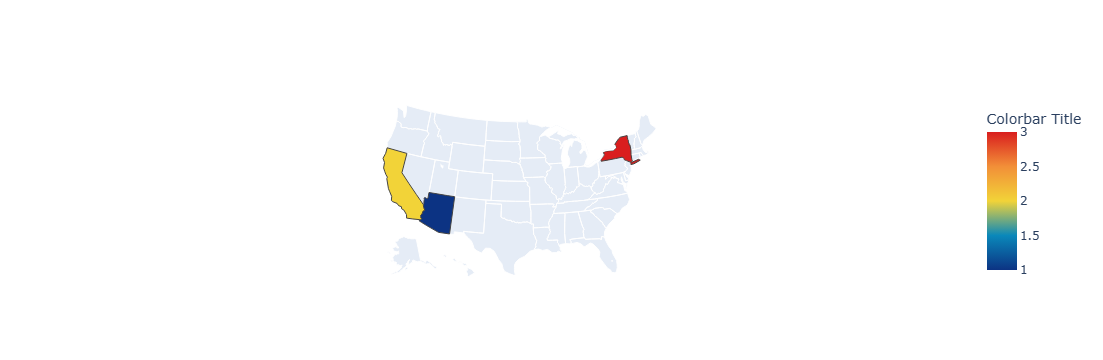

In [10]:
iplot(choromap)

### Real Data US Map Choropleth

Now let's show an example with some real data as well as some other options we can add to the dictionaries in data and layout.

In [11]:
df = pd.read_csv('2011_US_AGRI_Exports')
df.head()

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton,text
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61,Alabama<br>Beef 34.4 Dairy 4.06<br>Fruits 25.1...
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.00,0.6,1.0,1.56,0.0,0.0,0.00,Alaska<br>Beef 0.2 Dairy 0.19<br>Fruits 0.0 Ve...
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95,Arizona<br>Beef 71.3 Dairy 105.48<br>Fruits 60...
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44,Arkansas<br>Beef 53.2 Dairy 3.53<br>Fruits 6.8...
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.40,803.2,1303.5,2106.79,34.6,249.3,1064.95,California<br>Beef 228.7 Dairy 929.95<br>Frui...


Now out data dictionary with some extra marker and colorbar arguments:

In [31]:
data = dict(type='choropleth',
            colorscale = 'ylorbr',
            locations = df['code'],
            z = df['total exports'],
            locationmode = 'USA-states',
            text = df['text'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Millions USD"},
            ) 

SyntaxError: keyword argument repeated: colorscale (61870797.py, line 9)

And our layout dictionary with some more arguments:

In [16]:
layout = dict(title = '2011 US Agriculture Exports by State',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [17]:
choromap = go.Figure(data = [data],layout = layout)

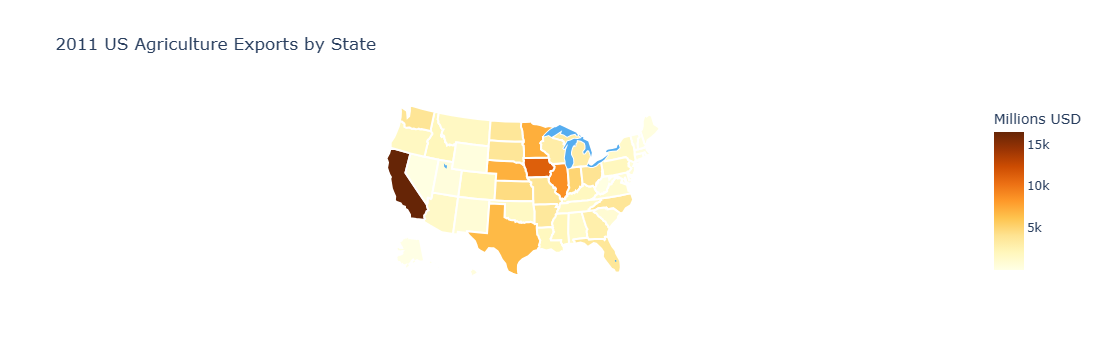

In [18]:
iplot(choromap)

# World Choropleth Map

Now let's see an example with a World Map:

In [19]:
df = pd.read_csv('2014_World_GDP')
df.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


In [35]:
data = dict(
        type = 'choropleth',
        locations = df['CODE'],
        z = df['GDP (BILLIONS)'],
        text = df['COUNTRY'],
        colorbar = {'title' : 'GDP Billions US'},
        colorscale = 'mint'
      ) 
"""
colorscale
[‘aggrnyl’, ‘agsunset’, ‘blackbody’, ‘bluered’, ‘blues’, ‘blugrn’, ‘bluyl’, ‘brwnyl’, ‘bugn’, ‘bupu’,’burg’, ‘burgyl’, ‘cividis’, ‘darkmint’, ‘electric’, ’emrld’, ‘gnbu’, ‘greens’, ‘greys’, ‘hot’, ‘inferno’,’jet’, ‘magenta’, ‘magma’, ‘mint’, ‘orrd’, ‘oranges’, ‘oryel’, ‘peach’, ‘pinkyl’, ‘plasma’, ‘plotly3′,’pubu’, ‘pubugn’, ‘purd’, ‘purp’, ‘purples’, ‘purpor’, ‘rainbow’, ‘rdbu’, ‘rdpu’, ‘redor’, ‘reds’,’sunset’, ‘sunsetdark’, ‘teal’, ‘tealgrn’, ‘turbo’, ‘viridis’, ‘ylgn’, ‘ylgnbu’, ‘ylorbr’, ‘ylorrd’,’algae’, ‘amp’, ‘deep’, ‘dense’, ‘gray’, ‘haline’, ‘ice’, ‘matter’, ‘solar’, ‘speed’, ‘tempo’, ‘thermal’,’turbid’, ‘armyrose’, ‘brbg’, ‘earth’, ‘fall’, ‘geyser’, ‘prgn’, ‘piyg’, ‘picnic’, ‘portland’, ‘puor’,’rdgy’, ‘rdylbu’, ‘rdylgn’, ‘spectral’, ‘tealrose’, ‘temps’, ‘tropic’, ‘balance’, ‘curl’, ‘delta’, ‘oxy’, ‘edge’, ‘hsv’, ‘icefire’, ‘phase’, ‘twilight’, ‘mrybm’, ‘mygbm’]
"""


In [36]:
layout = dict(
    title = '2014 Global GDP',
    geo = dict(
        showframe = False,
        projection = {'type':'albers'}
    )
)

"""
projection
 ['airy', 'aitoff', 'albers', 'albers usa', 'august',
            'azimuthal equal area', 'azimuthal equidistant', 'baker',
            'bertin1953', 'boggs', 'bonne', 'bottomley', 'bromley',
            'collignon', 'conic conformal', 'conic equal area', 'conic
            equidistant', 'craig', 'craster', 'cylindrical equal
            area', 'cylindrical stereographic', 'eckert1', 'eckert2',
            'eckert3', 'eckert4', 'eckert5', 'eckert6', 'eisenlohr',
            'equal earth', 'equirectangular', 'fahey', 'foucaut',
            'foucaut sinusoidal', 'ginzburg4', 'ginzburg5',
            'ginzburg6', 'ginzburg8', 'ginzburg9', 'gnomonic',
            'gringorten', 'gringorten quincuncial', 'guyou', 'hammer',
            'hill', 'homolosine', 'hufnagel', 'hyperelliptical',
            'kavrayskiy7', 'lagrange', 'larrivee', 'laskowski',
            'loximuthal', 'mercator', 'miller', 'mollweide', 'mt flat
            polar parabolic', 'mt flat polar quartic', 'mt flat polar
            sinusoidal', 'natural earth', 'natural earth1', 'natural
            earth2', 'nell hammer', 'nicolosi', 'orthographic',
            'patterson', 'peirce quincuncial', 'polyconic',
            'rectangular polyconic', 'robinson', 'satellite', 'sinu
            mollweide', 'sinusoidal', 'stereographic', 'times',
            'transverse mercator', 'van der grinten', 'van der
            grinten2', 'van der grinten3', 'van der grinten4',
            'wagner4', 'wagner6', 'wiechel', 'winkel tripel',
            'winkel3']
"""

"\n ['airy', 'aitoff', 'albers', 'albers usa', 'august',\n            'azimuthal equal area', 'azimuthal equidistant', 'baker',\n            'bertin1953', 'boggs', 'bonne', 'bottomley', 'bromley',\n            'collignon', 'conic conformal', 'conic equal area', 'conic\n            equidistant', 'craig', 'craster', 'cylindrical equal\n            area', 'cylindrical stereographic', 'eckert1', 'eckert2',\n            'eckert3', 'eckert4', 'eckert5', 'eckert6', 'eisenlohr',\n            'equal earth', 'equirectangular', 'fahey', 'foucaut',\n            'foucaut sinusoidal', 'ginzburg4', 'ginzburg5',\n            'ginzburg6', 'ginzburg8', 'ginzburg9', 'gnomonic',\n            'gringorten', 'gringorten quincuncial', 'guyou', 'hammer',\n            'hill', 'homolosine', 'hufnagel', 'hyperelliptical',\n            'kavrayskiy7', 'lagrange', 'larrivee', 'laskowski',\n            'loximuthal', 'mercator', 'miller', 'mollweide', 'mt flat\n            polar parabolic', 'mt flat polar quartic', 'm

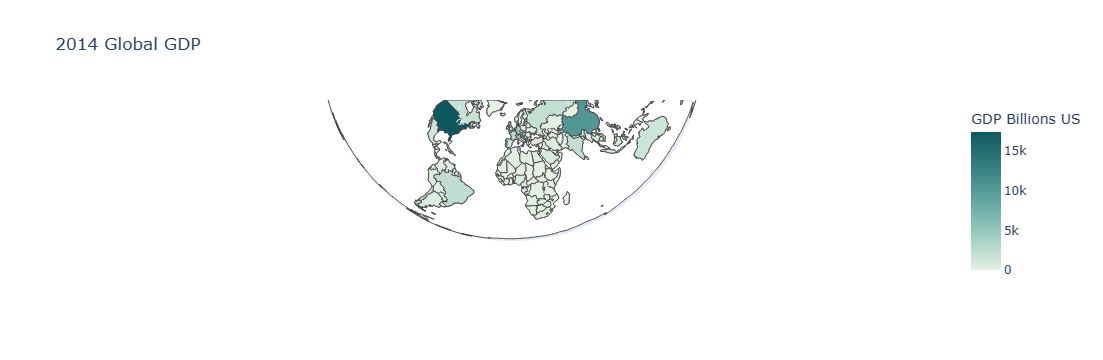

In [37]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

# Great Job!